Machine Learning with Probabilistic Programming 2020

In [1]:
import DTSBN
import read_data
import test_pred
import torch 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import torch.autograd as autograd
import torch.optim as optim
from torch.distributions import constraints, transform_to
import pyro.contrib.gp as gp
import math
import numpy as np


# Problem Descrition

In [2]:
#Load the data
data = torch.load('data.pt')

train_data = data[:, :int(data.size()[1]/3)*2]
test_data = data[:, int(data.size()[1]/3)*2:]

# Models


## Hidden Markov Model

## Deep Temporal Sigmoid Belief Model

Due to the time series nature of our data we still believed a markovian model would best describe our data.  However, we needed a model capable of modeling more complex functions than what a simple HMM could produce.  In our search for an appropriate model we found the Deep Temporal Sigmoid Belief Network.  The Deep Temporal Sigmoid Belief Network is actually composed of two different networks. The generative network is composed of sigmoid belief layers that stack on top of each other and lead to a final output layer, which in our case maps the final hidden state to real valued data.  This layer attempts to generate the next data point based on the previous hidden state and data point. The recognition network is composed soley of sigmoid belief layers.  This network attempts to generate the hidden states that produced a given data point, using the previous infered hidden states and current data point. A visual representation of the model is shown below. 

<img src="DTSBN.png" alt="drawing" width="500"/>

Given dataset *V* = {*v<sub>1</sub>*, *v<sub>2</sub>*, ... , *v<sub>t</sub>*}, an accompanying set of hidden states *H* = {*h<sub>1</sub>*, *h<sub>2</sub>*, ... , *h<sub>T</sub>*}, and a set of parameters $\theta$, <img src="https://render.githubusercontent.com/render/math?math=P_{\theta}(V, H) = \Pi^{T}_{t=1} P_{\theta}(h_t|h_{t-1},v_{t-1})P_{\theta}(v_t|h_{t},v_{t-1}) ">  with *h<sub>0</sub>*, *v<sub>0</sub>* defined as zero vectors to make the calculations possible.  As we are attempting to predict the crash probabilite at time *T*, we can write <img src="https://render.githubusercontent.com/render/math?math=P_{\theta}(crash_T|\{v_1, v_2, ... ,v_{t-1}\}) =  \sum_{V_c}\sum_H P_{\theta}(\{v_1, v_2, ... ,v_{t-1}, v_c \}, h)"> where *V<sub>c</sub>* is the set of all *v<sub>T</sub>* that would constitute a crash.  Unfortunately however, these is not a closed form solution to this probablility for Deep Temporal Sigmoid Belief Networks.  Hence we estimate the crash probability via monte carlo sampling from the model.  Suppose we have *n* samples drawn from the model for *v<sub>T</sub>*


In [1]:
#Define the base model
data_size = 1404
hidden_size = 1404
dims = [hidden_size, data_size]
DTSBN_base = DTSBN.DTSBN(dims, 1, 1)

#Define the Data Dependent Baseline
dims.reverse()
DDBL_base = DTSBN.DDBL(dims)

NameError: name 'DTSBN' is not defined

In [46]:
#Show trainning of model
DTSBN.Adam(DTSBN_base, DDBL_base, train_data, torch.nn.MSELoss(), epochs=15, Noisy=False)

epoch 1 average loss: -1054.8012390865063
epoch 2 average loss: -534.02863306305
epoch 3 average loss: -464.90337908979245
epoch 4 average loss: -421.9748430274836
epoch 5 average loss: -386.1439402723654
epoch 6 average loss: -353.1906691667288
epoch 7 average loss: -317.2585984550968
epoch 8 average loss: -284.3782674930545
epoch 9 average loss: -248.98103383503553
epoch 10 average loss: -217.01967619028753
epoch 11 average loss: -184.16354818048228
epoch 12 average loss: -148.72810813521428
epoch 13 average loss: -112.61006083522605
epoch 14 average loss: -78.21529338924938
epoch 15 average loss: -43.55181816483454


[-1054.8012390865063,
 -534.02863306305,
 -464.90337908979245,
 -421.9748430274836,
 -386.1439402723654,
 -353.1906691667288,
 -317.2585984550968,
 -284.3782674930545,
 -248.98103383503553,
 -217.01967619028753,
 -184.16354818048228,
 -148.72810813521428,
 -112.61006083522605,
 -78.21529338924938,
 -43.55181816483454]

In [28]:
#Load the fully trained model


/Users/jonahdeykin/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


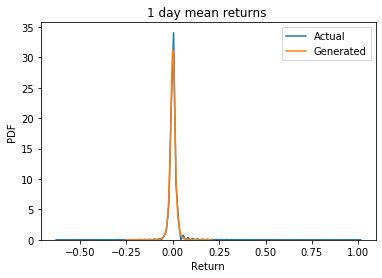

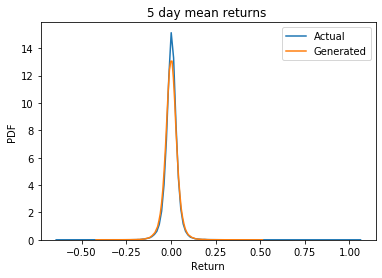

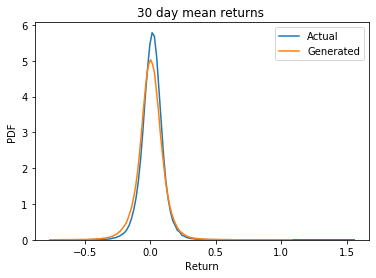

In [75]:
test_pred.graph_rets(train_data, 'data_recovery.txt', DTSBN_base, 1100, 1)
test_pred.graph_rets(train_data, 'data_recovery.txt', DTSBN_base, 1100, 5)
test_pred.graph_rets(train_data, 'data_recovery.txt', DTSBN_base, 1100, 30)


/Users/jonahdeykin/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


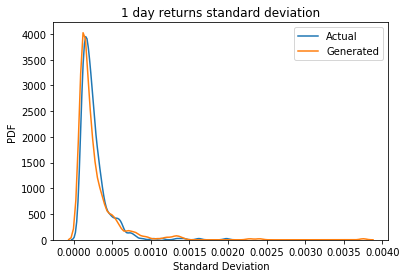

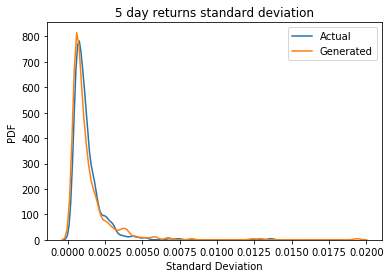

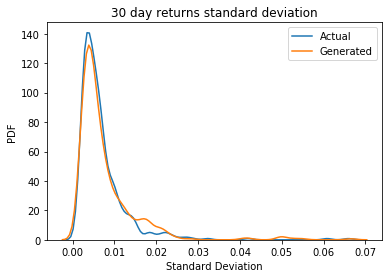

In [76]:
test_pred.graph_vars(train_data, 'data_recovery.txt', DTSBN_base, 1100, 1)
test_pred.graph_vars(train_data, 'data_recovery.txt', DTSBN_base, 1100, 5)
test_pred.graph_vars(train_data, 'data_recovery.txt', DTSBN_base, 1100, 30)


In [ ]:
#Load Grid Search Optimized Model
DTSBN_grid = 'filler'


In [ ]:
graph_rets(train_data, 'data_recovery.txt', DTSBN_grid, 1100, 1)
graph_rets(train_data, 'data_recovery.txt', DTSBN_grid, 1100, 5)
graph_rets(train_data, 'data_recovery.txt', DTSBN_grid, 1100, 30)

In [ ]:
graph_vars(train_data, 'data_recovery.txt', DTSBN_grid, 1100, 1)
graph_vars(train_data, 'data_recovery.txt', DTSBN_grid, 1100, 5)
graph_vars(train_data, 'data_recovery.txt', DTSBN_grid, 1100, 30)

In [85]:
class bayesian_op():
    def __init__(self):
        self.ranges = None
        self.data = None
        self.gpmodel = None
        self.time_limit = None

    def run(self, ranges, data, warmup, bayesian, time_limit):

        self.ranges = ranges
        self.data = data
        self.time_limit = time_limit

        X = torch.rand((warmup, 3))
        y = torch.zeros((warmup,))

        for j in range(0, warmup):
            configs = [((self.ranges[i][1]-self.ranges[i][0]) *
                        X[j][i].item())
                       + self.ranges[i][0] for i in range(0, 3)]
            dims = [self.data.size()[0]]

            for _ in range(0, int(configs[1])):
                dims.append(max(1, int(dims[-1] / configs[0])))

            DDBL_net = DTSBN.DDBL(dims)
            dims.reverse()
            DTSBN_net = DTSBN.DTSBN(dims, int(configs[1]), int(configs[2]))

            y[j] = DTSBN.Adam(DTSBN_net, DDBL_net, self.data, torch.nn.MSELoss(),
                        t_max=self.time_limit, Noisy=False)
            print('warmup step {}/{}'.format(j+1, warmup))
        self.gpmodel = gp.models.GPRegression(X, y,
                                              gp.kernels.Matern52(
                                                                  input_dim=3
                                                                  ),
                                              noise=torch.tensor(0.1),
                                              jitter=1.0e-4)

        for j in range(0, bayesian):
            x_min = self.next_x()
            self.update_posterior(x_min)
            print('bayesian step {}/{}'.format(j+1, bayesian))

        return (self.gpmodel.X, self.gpmodel.y)

    def update_posterior(self, x_new):

        configs = [((self.ranges[i][1]-self.ranges[i][0]) * x_new[i].item()) +
                   self.ranges[i][0] for i in range(0, 3)]
        dims = [self.data.size()[0]]

        for _ in range(0, int(configs[1])):
            dims.append(max(1, int(dims[-1] / configs[0])))

        DDBL_net = DTSBN.DDBL(dims)
        dims.reverse()
        DTSBN_net = DTSBN.DTSBN(dims, int(configs[1]), int(configs[2]))

        y = torch.tensor(DTSBN.Adam(DTSBN_net, DDBL_net, self.data, torch.nn.MSELoss(),
                              t_max=self.time_limit, Noisy=False))
        x_fix = torch.zeros((1, 3))
        x_fix[0] = x_new
        X = torch.cat([self.gpmodel.X, x_fix])
        y_fix = torch.zeros((1,))
        y_fix[0] = y
        y = torch.cat([self.gpmodel.y, y_fix])

        self.gpmodel.set_data(X, y)

        # optimize the GP hyperparameters using Adam with lr=0.001
        optimizer = torch.optim.Adam(self.gpmodel.parameters(), lr=0.001)
        gp.util.train(self.gpmodel, optimizer)

    def lower_confidence_bound(self, x, kappa=2):

        x_fix = torch.zeros((1, x.size()[0]))
        x_fix[0] = x
        mu, variance = self.gpmodel(x_fix, full_cov=False, noiseless=False)
        sigma = variance.sqrt()
        return -mu - kappa * sigma

    def find_a_candidate(self, x_init, lower_bound=0, upper_bound=1):
        # transform x to an unconstrained domain
        constraint = constraints.interval(lower_bound, upper_bound)
        unconstrained_x_init = transform_to(constraint).inv(x_init)
        unconstrained_x = (unconstrained_x_init.clone().detach()
                           .requires_grad_(True))
        minimizer = optim.LBFGS([unconstrained_x],
                                line_search_fn='strong_wolfe')

        def closure():
            minimizer.zero_grad()
            x = transform_to(constraint)(unconstrained_x)
            y = self.lower_confidence_bound(x)
            autograd.backward(unconstrained_x, autograd.grad(y,
                                                             unconstrained_x))
            return y

        minimizer.step(closure)
        # after finding a candidate in the unconstrained domain,
        # convert it back to original domain.
        x = transform_to(constraint)(unconstrained_x)
        return x.detach()

    def next_x(self, lower_bound=0, upper_bound=1, num_candidates=5):
        candidates = []
        values = []

        x_init = self.gpmodel.X[-1]
        for i in range(num_candidates):
            x = self.find_a_candidate(x_init, lower_bound, upper_bound)
            y = self.lower_confidence_bound(x)
            candidates.append(x)
            values.append(y)
            x_init = x.new_empty(3).uniform_(lower_bound, upper_bound)

        argmin = torch.min(torch.cat(values), dim=0)[1].item()
        return candidates[argmin]


In [86]:
bayesian = bayesian_op()
candidates = bayesian.run( ((1, 10), (1, 6), (1, 6)), data, 7, 13, 15)

epoch 1 average loss: -1523.60796875
warmup step 1/7
epoch 1 average loss: -1359.5342307692308
warmup step 2/7
epoch 1 average loss: -1362.14453125
warmup step 3/7
epoch 1 average loss: -1518.709125
warmup step 4/7
epoch 1 average loss: -1472.9691666666668
warmup step 5/7
epoch 1 average loss: -1378.7551785714286
warmup step 6/7
epoch 1 average loss: -1363.58515625
warmup step 7/7
epoch 1 average loss: -1586.066125
bayesian step 1/13
epoch 1 average loss: -1344.6537162162163
epoch 2 average loss: -1143.0882352941176
epoch 3 average loss: -956.2538751987281
epoch 4 average loss: -881.6864069952305
bayesian step 2/13
epoch 1 average loss: -1344.3659578696343
epoch 2 average loss: -1144.3822535771064
epoch 3 average loss: -955.6607710651829
epoch 4 average loss: -866.6192368839428
bayesian step 3/13
epoch 1 average loss: -1347.2973966613672
epoch 2 average loss: -1145.956081081081
epoch 3 average loss: -956.8043521462639
epoch 4 average loss: -927.9289546899842
bayesian step 4/13
epoch 1 

In [93]:
def hyperband(budget, ranges, eta, data):

    s_max = math.floor(math.log(budget))
    b = (s_max+1)*budget

    s_list = [i for i in range(0, s_max + 1)]
    s_list.reverse()
    best_configs = torch.zeros((s_max+1, 5))

    tot = 0
    for s in s_list:
        n = math.ceil((b/budget)*(eta**s)/(s+1))
        r = int(budget*eta**-s)
        configs = []
        for _ in range(0, n):
            rands = np.random.uniform(size=(n,))
            config = [((ranges[i][1]-ranges[i][0])*rands[i])+ranges[i][0]
                      for i in range(0, 3)]

            dims = [data.size()[0]]
            for _ in range(0, int(config[1])):
                dims.append(max(int(dims[-1] / config[0]), 1))

            DDBL_net = DTSBN.DDBL(dims)
            dims.reverse()
            DTSBN_net = DTSBN.DTSBN(dims, int(config[1]), int(config[2]))

            configs.append([0, (DTSBN_net, DDBL_net), config])

        for i in range(0, s+1):
            n_i = math.floor(n*eta**-i)
            r_i = r * eta**i
            new_configs = []
            for config in configs:
                tot += r_i

                loss = DTSBN.Adam(config[1][0], config[1][1], data, torch.nn.MSELoss(),
                            t_max=r_i, Noisy=False)
                new_configs.append([loss, config[1], config[2]])

            new_configs.sort(key=lambda x: -x[0])

            configs = new_configs[:max(1, math.floor(n_i/eta))]

            print(i, s, s_max)
            if len(configs) == 1:
                break

        best_configs[s_max-s][0] = configs[0][0]
        best_configs[s_max-s][1] = configs[0][2][0]
        best_configs[s_max-s][2] = configs[0][2][1]
        best_configs[s_max-s][3] = configs[0][2][2]

    return(best_configs)

In [94]:
hyperband(15, ((1, 10), (1, 6), (1, 6)), 3, train_data)

epoch 1 average loss: -1470.8428125
epoch 1 average loss: -1523.41390625
epoch 1 average loss: -1513.16171875
epoch 1 average loss: -1472.53765625
epoch 1 average loss: -1515.995
epoch 1 average loss: -1486.0021875
epoch 1 average loss: -1418.9965625
epoch 1 average loss: -1411.28075
epoch 1 average loss: -1512.3175
0 2 2
epoch 1 average loss: -1309.1139166666667
epoch 1 average loss: -1332.7797916666666
epoch 1 average loss: -1420.0121875
1 2 2
epoch 1 average loss: -1439.28825
epoch 1 average loss: -1602.3834375
epoch 1 average loss: -1575.068125
epoch 1 average loss: -1587.03359375
epoch 1 average loss: -1560.9265625
0 1 2
epoch 1 average loss: -1383.662291169451
epoch 2 average loss: -1235.7113663484488
epoch 3 average loss: -1099.1642303102626
epoch 4 average loss: -964.5821897374701
epoch 5 average loss: -948.3697046539379
epoch 1 average loss: -1313.3914081145585
epoch 2 average loss: -993.2963902147972
epoch 3 average loss: -703.4055787589499
epoch 1 average loss: -1353.2555681

tensor([[-1.3091e+03,  7.0095e+00,  2.4313e+00,  1.7532e+00,  0.0000e+00],
        [-1.4393e+03,  9.1994e+00,  4.7818e+00,  2.0120e+00,  0.0000e+00],
        [-7.0341e+02,  3.8544e+00,  4.4879e+00,  1.4199e+00,  0.0000e+00]])

In [ ]:
#Load Trained Models
DTSBN_hyp = 'filler'
DTSBN_bo = 'filler'

In [ ]:
test_pred.graph_rets(train_data, 'data_recovery.txt', DTSBN_hyp, 1100, 1)
test_pred.graph_rets(train_data, 'data_recovery.txt', DTSBN_hyp, 1100, 5)
test_pred.graph_rets(train_data, 'data_recovery.txt', DTSBN_hyp, 1100, 30)

In [ ]:
test_pred.graph_rets(train_data, 'data_recovery.txt', DTSBN_bo, 1100, 1)
test_pred.graph_rets(train_data, 'data_recovery.txt', DTSBN_bo, 1100, 5)
test_pred.graph_rets(train_data, 'data_recovery.txt', DTSBN_bo, 1100, 30)

In [ ]:
test_pred.graph_vars(train_data, 'data_recovery.txt', DTSBN_hyp, 1100, 1)
test_pred.graph_vars(train_data, 'data_recovery.txt', DTSBN_hyp, 1100, 5)
test_pred.graph_vars(train_data, 'data_recovery.txt', DTSBN_hyp, 1100, 30)

In [ ]:
test_pred.graph_vars(train_data, 'data_recovery.txt', DTSBN_bo, 1100, 1)
test_pred.graph_vars(train_data, 'data_recovery.txt', DTSBN_bo, 1100, 5)
test_pred.graph_vars(train_data, 'data_recovery.txt', DTSBN_bo, 1100, 30)

In [90]:
n_reps = 25
n_forward = 1
samples_bo_1 = test_pred.sample_n_forward(DTSBN_bo, 'data.pt', int(data.size()[1]*2/3), n_reps, n_forward, steps_back)
samples_hyp_1 = test_pred.sample_n_forward(DTSBN_hyp, 'data.pt', int(data.size()[1]*2/3), n_reps, n_forward, steps_back)

n_forward = 5
samples_bo_5 = test_pred.sample_n_forward(DTSBN_bo, 'data.pt', int(data.size()[1]*2/3), n_reps, n_forward, steps_back)
samples_hyp_5 = test_pred.sample_n_forward(DTSBN_hyp, 'data.pt', int(data.size()[1]*2/3), n_reps, n_forward, steps_back)

prices_bo_1 = test_pred.generate_prices(samples_bo_1, 'unnormalized_data.pt', 'data_recovery.txt')
prices_hyp_1 = test_pred.generate_prices(samples_hyp_1, 'unnormalized_data.pt', 'data_recovery.txt')

prices_bo_25 = test_pred.generate_prices(samples_bo_25, 'unnormalized_data.pt', 'data_recovery.txt')
prices_hyp_25 = test_pred.generate_prices(samples_hyp_25, 'unnormalized_data.pt', 'data_recovery.txt')

n_forward = 1
predicted_bo_1, actual_1 = check_val_weighted_return('unnormalized_data.pt', prices_bo_1, n_forward, 'm_cap.pt', 'price_index_list.txt', 'size_index_list.txt')
predicted_hyp_1, _ = check_val_weighted_return('unnormalized_data.pt', prices_hyp_1, n_forward, 'm_cap.pt', 'price_index_list.txt', 'size_index_list.txt')

n_forward = 5
predicted_bo_5, actual_5 = check_val_weighted_return('unnormalized_data.pt', prices_bo_5, n_forward, 'm_cap.pt', 'price_index_list.txt', 'size_index_list.txt')
predicted_hyp_5, _ = check_val_weighted_return('unnormalized_data.pt', prices_hyp_5, n_forward, 'm_cap.pt', 'price_index_list.txt', 'size_index_list.txt')

with open('dates.txt', 'rb') as f:
        dates = pickle.load(f)



NameError: name 'DTSBN_net' is not defined

In [ ]:
n_forward = 1
level = 0.005

test_preds.graph_change(predicted_bo_1, actual_1, dates, n_forward)
test_preds.graph_change(predicted_hyp_1, actual_1, dates, n_forward)

test_preds.graph_prob(predicted_bo_1, actual_1, level, dates, n_forward)
test_preds.graph_prob(predicted_hyp_1, actual_1, level, dates, n_forward)

n_forward = 5
level = 0.02

test_preds.graph_change(predicted_bo_5, actual_5, dates, n_forward)
test_preds.graph_change(predicted_hyp_5, actual_5, dates, n_forward)

test_preds.graph_prob(predicted_bo_5, actual_5, level, dates, n_forward)
test_preds.graph_prob(predicted_hyp_5, actual_5, level, dates, n_forward)